# First Order Methods

First order methods help discern descent direction in order to find a minima. The descent direction is opposite to the gradient.

## Gradient Descent 

$g^k = ∇f(x^k)$ and normalized descent direction $d^k = - g^k / ||g^k||$

In [37]:
using Plots
using LinearAlgebra
using OptiMize: plot_min_of_f, complex_step

mutable struct OptConfig
    a::Float64
    b::Float64
    ϵ::Float64
    type::String
end

function step(x, dx)
    return x .- dx
end

function descent(∇f, x, a)
    return a * ∇f(x)
end

function momentum!(∇f, x, a, b, v)
    v[:] = b * v - a * ∇f(x)
    return -v
end

function rms_prop!(∇f, x, a, b, s, ϵ)
    s[:] = b * s .+ (1 - b) * dot(∇f(x), ∇f(x))
    return a * ∇f(x) ./ sqrt.(s .+ ϵ)
end

function adam!(∇f, x, a, b, v, s, ϵ, k)
    v[:] = b * v .+ (1 - b) * ∇f(x)
    s[:] = b * s .+ (1 - b) * dot(∇f(x), ∇f(x))
    v_hat = v ./ (1 - b^k)
    s_hat = s ./ (1 - b^k)
    return a * v_hat ./ (sqrt.(s_hat) .+ ϵ)
end

function gradient_descent(f, ∇f, x, opt, px=[], py=[])
    a = opt.a
    b = opt.b
    ϵ = opt.ϵ
    type = opt.type

    k = 1

    v = zeros(length(x))
    s = zeros(length(x))
    anim = @animate while norm(∇f(x)) > ϵ
        if type == "momentum"
            dx = momentum!(∇f, x, a, b, v)
        elseif type == "rms_prop"
            dx = rms_prop!(∇f, x, a, b, s, ϵ)
        elseif type == "adam"
            dx = adam!(∇f, x, a, b, v, s, ϵ, k)
        else
            dx = descent(∇f, x, a)
        end
        
        x = step(x, dx)

        if py != []
            z = f(x[1], x[2])
            plot_min_of_f(f, px, py, [x[1] x[2] z])
        else
            pts = cat(x, f(x), dims=2)
            plot_min_of_f(f, px, pts)
        end

        k += 1
    end
    return x, anim
end

gradient_descent (generic function with 3 methods)

Minimum of f is at x = [2.9110886795646564e-6] with f(x) = [10.000000000001412]


[ Info: Saved animation to /Users/dakre/work/OptiMize.jl/notebooks/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/OptiMize.jl/notebooks/tmp.gif")
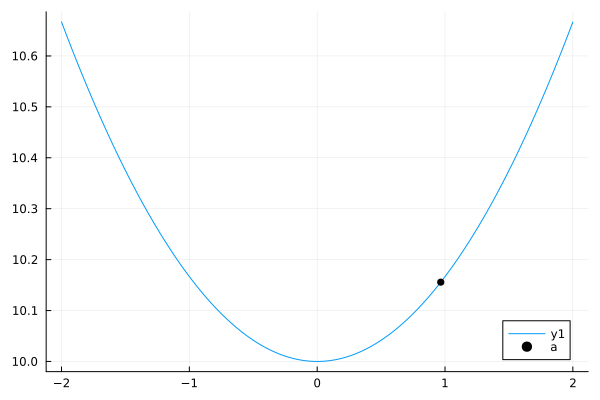

In [38]:
x0 = [1.]

f(x) = x.^2 / 6 .+ 10

∇f(x) = complex_step(f, x)

opt_config = OptConfig(0.1, 0.9, 1e-6, "")

px = range(-2, 2, length=100)

x, anim = gradient_descent(f, ∇f, x0, opt_config, px)

println("Minimum of f is at x = ", x, " with f(x) = ", f(x))

gif(anim, fps = 10)

Minimum of f is at x = [2.366586354939947e-6, 1.7749397662049623e-6] with f(x) = 0.9999976334195957


[ Info: Saved animation to /Users/dakre/work/OptiMize.jl/notebooks/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/OptiMize.jl/notebooks/tmp.gif")
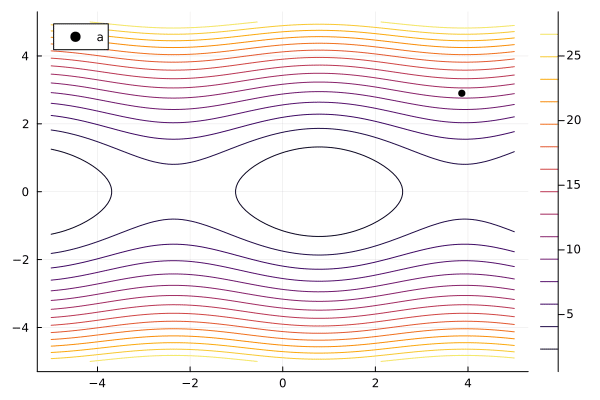

In [39]:
x0 = [4., 3.]
f(x, y) = y^2 - (sin(x) + cos(x)) + 2

∇f(x, y) = complex_step(f, x, y)

px = range(-5, 5, length=100)
py = range(-5, 5, length=100)

x, anim = gradient_descent(f, ∇f, x0, opt_config, px, py)

println("Minimum of f is at x = ", x, " with f(x) = ", f(x...))

gif(anim, fps = 10)

## Gradient Descent with Momentum

Gradient descent with momentum allows the optimization to accumulate "momentum" like a ball falling building up to reach terminal velocity.

$v^{k+1} = b * v^k - a * g^k$

$x^{k+1} = x^k + v^{k+1}$

Minimum of f is at x = [5.669549497627707e-7, 4.252162123220992e-7] with f(x) = 0.9999994330453919


[ Info: Saved animation to /Users/dakre/work/OptiMize.jl/notebooks/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/OptiMize.jl/notebooks/tmp.gif")
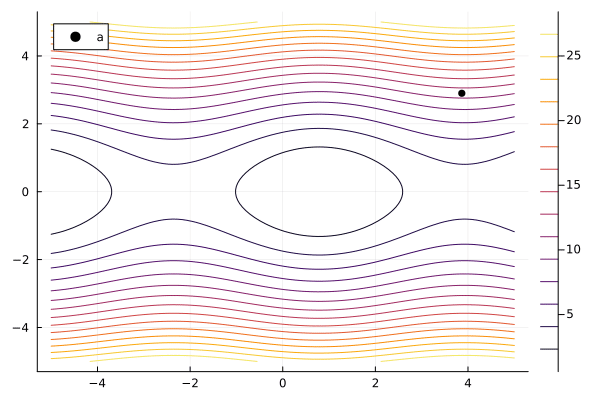

In [40]:
opt_config.type = "momentum"

x, anim = gradient_descent(f, ∇f, x0, opt_config, px, py)

println("Minimum of f is at x = ", x, " with f(x) = ", f(x...))

gif(anim, fps = 10)

## Gradient Descent with RMSProp

RMSProp is root mean square of the gradients propagation technique. This maintains the decaying average of the gradients squared.

$s^{k+1} = γ*s^{k} + (1 - γ)(dot(g^k, g^k))$

$x_i^{k+1} = (x_i^k - a \div (eps + sqrt(s_i^{k+1}))) * g_i^k$

γ is the decay rate and s is the sum of squared gradients

Minimum of f is at x = [1.0999763318444868e-6, 8.249822488833642e-7] with f(x) = 0.9999989000249536


[ Info: Saved animation to /Users/dakre/work/OptiMize.jl/notebooks/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/OptiMize.jl/notebooks/tmp.gif")
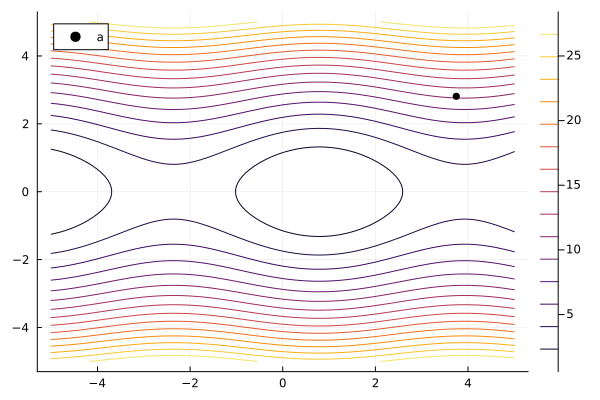

In [41]:
opt_config.type = "rms_prop"

x, anim = gradient_descent(f, ∇f, x0, opt_config, px, py)

println("Minimum of f is at x = ", x, " with f(x) = ", f(x...))

gif(anim, fps = 10)

## Gradient Descent with Adam

Adam (AKA adapted method estimation) which essentially combines momentum with rms prop

Minimum of f is at x = [8.530854892943411e-7, 6.398141169689127e-7] with f(x) = 0.999999146915284


[ Info: Saved animation to /Users/dakre/work/OptiMize.jl/notebooks/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/OptiMize.jl/notebooks/tmp.gif")
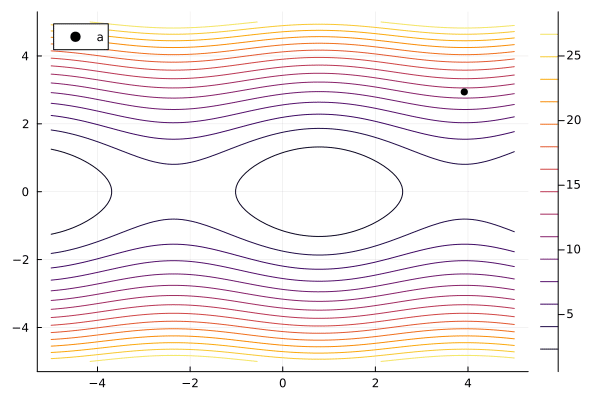

In [42]:
opt_config.type = "adam"

x, anim = gradient_descent(f, ∇f, x0, opt_config, px, py)

println("Minimum of f is at x = ", x, " with f(x) = ", f(x...))

gif(anim, fps = 10)